<center><img src="prog_lang.jpg" width=500></center>

How can you determine which programming languages and technologies are most widely used? Which languages are gaining or losing popularity, helping you decide where to focus your efforts?

One excellent data source is Stack Overflow, a programming question-and-answer site with more than 16 million questions on programming topics. Each Stack Overflow question is tagged with a label identifying its topic or technology. By counting the number of questions related to each technology, you can estimate the popularity of different programming languages.

In this project, you will use data from the Stack Exchange Data Explorer to examine how the relative popularity of R, Python, Java, and JavaScript has changed over time.

You'll work with a dataset containing one observation per tag per year, including the number of questions for that tag and the total number of questions that year.

`stack_overflow_data.csv`
|Column|Description|
|------|-----------|
|`year`|The year the question was asked (2008-2020)|
|`tag`|A word or phrase that describes the topic of the question|
|`num_questions`|The number of questions with a certain tag in that year|
|`year_total`|The total number of questions asked in that year|

In [35]:
# Load necessary packages
library(readr)
library(dplyr)
library(ggplot2)

In [36]:
# Load the dataset
data <- read_csv("stack_overflow_data.csv")

Rows: 420066 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): tag
dbl (3): year, num_questions, year_total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Discover the trends in the popularity of programming languages by answering the following questions:

- What was the percentage of `R` questions for 2020? Save the result in a data frame, `r_2020`, containing five columns: `year`, `tag`, `num_questions`, `year_total`, and `percentage`.

In [37]:
data_percentage <- data %>%
  mutate(percentage = (num_questions / year_total) * 100)

# Filter for R tags
r_over_time <- data_percentage %>%
  filter(tag == "r")

r_2020 <- r_over_time %>%
  filter(year == "2020")

print(r_2020)

# A tibble: 1 × 5
   year tag   num_questions year_total percentage
  <dbl> <chr>         <dbl>      <dbl>      <dbl>
1  2020 r             52662    5452545      0.966


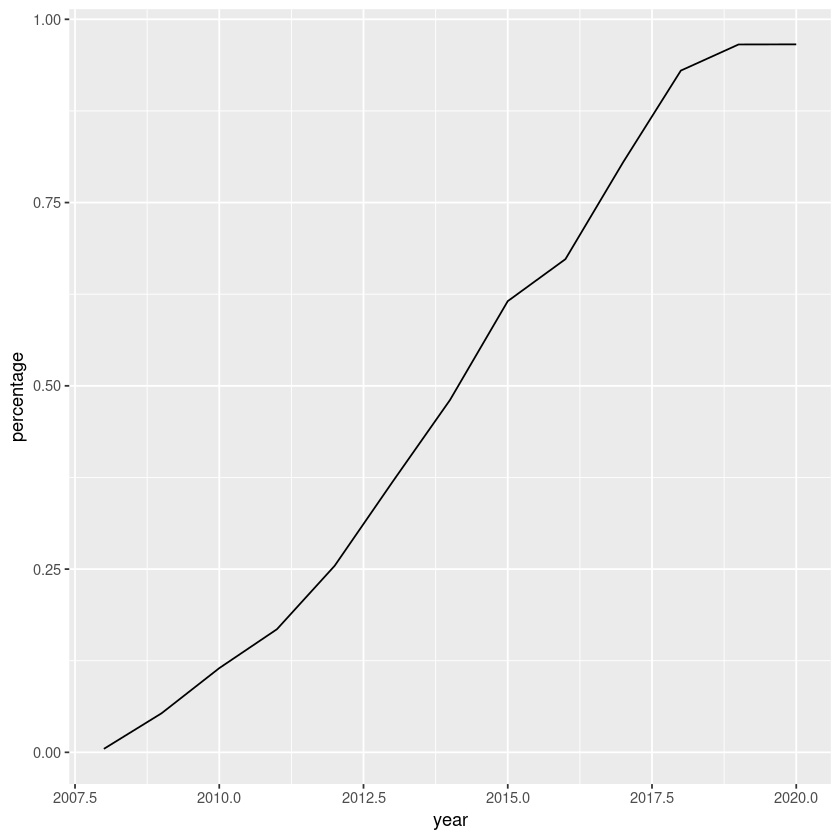

In [38]:
ggplot(r_over_time) +
  geom_line(aes(x = year, y = percentage))

- Identify the five programming language tags with the highest total number of questions asked between 2015 and 2020 (inclusive). Save the tag names as `highest_tags`. This variable can be a character vector, tibble, or data frame (if the latter, please use the column name `tag`).

In [39]:
sorted_tags <- data %>%
  filter(year >= 2015) %>% 
  group_by(tag) %>% 
  summarize(tag_total = sum(num_questions)) %>% 
  arrange(desc(tag_total))

# Get the five largest tags
# Another way of doing the below is by selecting the column with $: highest_tags <- head(sorted_tags$tag, n = 5)
highest_tags <- sorted_tags %>% 
  select(tag) %>% 
  head(n = 5)

print(highest_tags)

# A tibble: 5 × 1
  tag       
  <chr>     
1 javascript
2 python    
3 java      
4 android   
5 c#        


In [40]:
# Question 4: Which tag experienced the largest year-over-year increase in its fraction of questions?

# Calculate the fraction of questions for each tag per year
data_fraction_year <- data %>% 
  group_by(year) %>% 
  mutate(year_total = sum(num_questions)) %>% 
  ungroup() %>% 
  mutate(fraction = num_questions / year_total)

# Calculate the ratio of the fraction of questions for each tag compared to the previous year
tag_ratios_filtered <- data_fraction_year %>% 
  arrange(tag, year) %>% 
  group_by(tag) %>% 
  mutate(ratio = fraction / lag(fraction)) %>% 
  ungroup()

# Find the tag with the highest ratio increase
highest_ratios <- tag_ratios_filtered %>% 
  slice_max(ratio, n = 1)

highest_ratio_tag <- highest_ratios$tag
highest_ratio_tag

[1] "swiftui"